In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from utils.helpers import read_stock_data
from utils.plot import plot_predictions, plot_loss
from prepro.data_curation import create_preprocessing_pipeline, prepare_data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [48]:
# Load data
current_stock = "amzn"
file = os.path.join(os.getcwd(), "../archive", "Stocks", f"{current_stock}.us.txt")

data = read_stock_data(file)

print(data.head(), data.shape)

X, y = prepare_data(data)
print(X.shape)

        Date  Open  High   Low  Close    Volume  OpenInt
0 1997-05-16  1.97  1.98  1.71   1.73  14700000        0
1 1997-05-19  1.76  1.77  1.62   1.71   6106800        0
2 1997-05-20  1.73  1.75  1.64   1.64   5467200        0
3 1997-05-21  1.64  1.65  1.38   1.43  18853200        0
4 1997-05-22  1.44  1.45  1.31   1.40  11776800        0 (5153, 7)
Close      1.000000
Low        0.999939
High       0.999936
Open       0.999864
Date       0.789890
Volume    -0.299428
OpenInt         NaN
Name: Close, dtype: float64
(5140, 4)


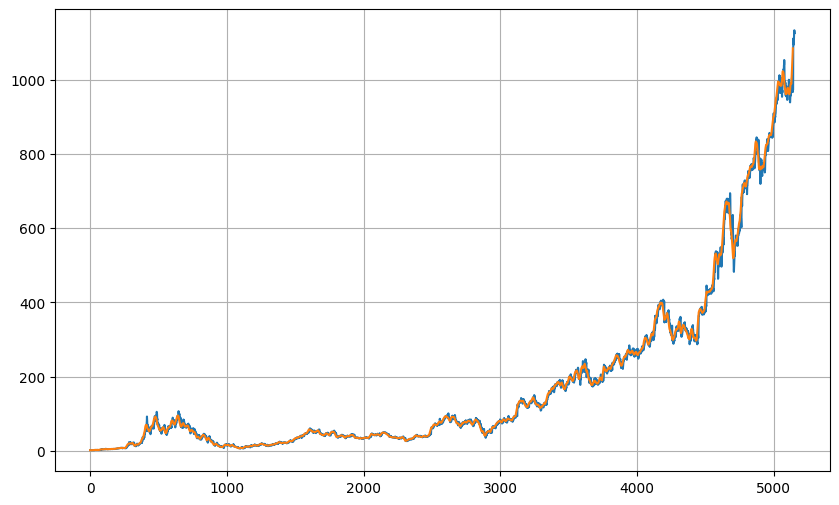

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(y, label='MA', )
plt.grid()

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)
y_scaler = MinMaxScaler(feature_range=(-1, 1))
y = y_scaler.fit_transform(y)
pipeline = create_preprocessing_pipeline(window_size=10)
X_red = pipeline.fit_transform(X_scaled)

In [52]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=100)
y_pred = clf.fit_predict(X_scaled)
X_scores = clf.negative_outlier_factor_
print(sum(y_pred == -1), "outliers detected")

58 outliers detected


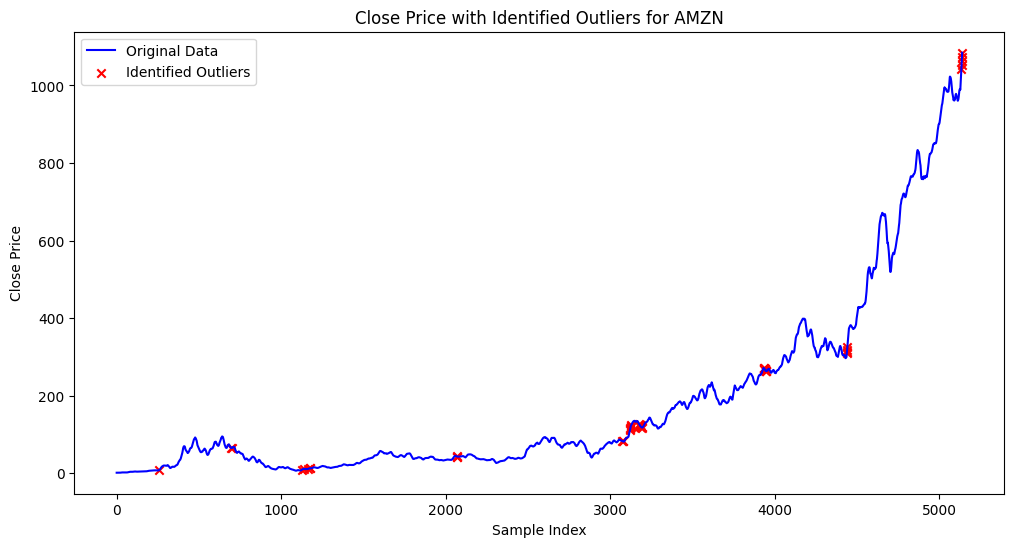

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Original Data', color='blue')
outlier_indices = (y_pred == -1)
plt.scatter(
    np.where(outlier_indices),
    y[outlier_indices],
    color='red',
    label='Identified Outliers',
    marker='x'
)
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title(f'Close Price with Identified Outliers for {current_stock.upper()}')
plt.legend()
plt.show()

In [54]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=42)
clf.fit(X_scaled)
y_pred = clf.predict(X_scaled)
print(sum(y_pred == -1), "outliers detected")

1152 outliers detected


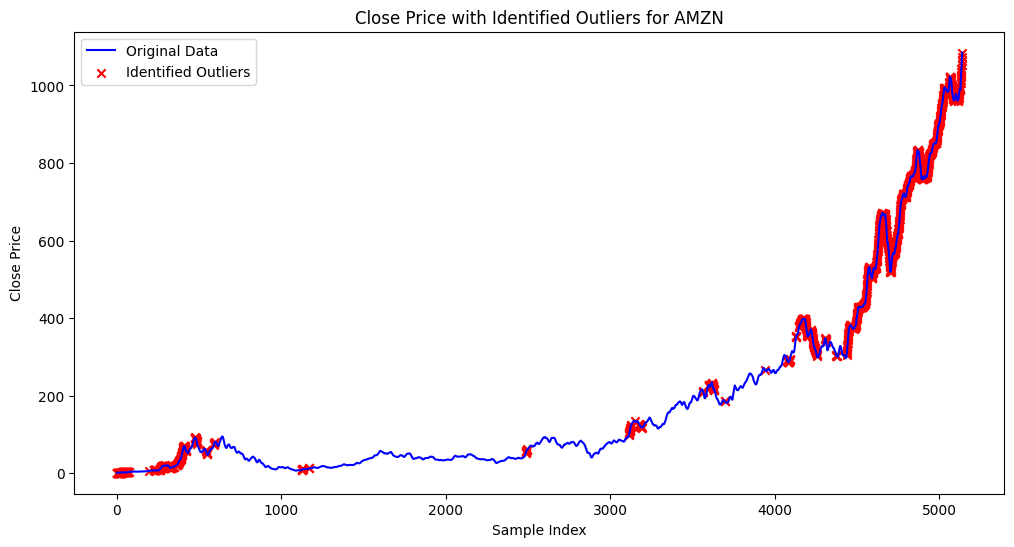

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Original Data', color='blue')
outlier_indices = (y_pred == -1)
plt.scatter(
    np.where(outlier_indices),
    y[outlier_indices],
    color='red',
    label='Identified Outliers',
    marker='x'
)
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title(f'Close Price with Identified Outliers for {current_stock.upper()}')
plt.legend()
plt.show()

In [74]:
import pandas as pd
from polygon import RESTClient
from dotenv import load_dotenv

load_dotenv("C:\\Users\\pasca\\Documents\\Playground\\AlgoTrading\\local_secrets.env")
api_key = os.getenv("POLYGON_API_KEY")

client = RESTClient(api_key)
today = pd.Timestamp.now().strftime("%Y-%m-%d")
back_dated = (
    pd.Timestamp.now().replace(year=pd.Timestamp.now().year - 3).strftime("%Y-%m-%d")
)
print(back_dated, today)

history = client.get_aggs(
    ticker="AAPL", multiplier=1, timespan="day", from_=back_dated, to=today
)
chart_data = pd.DataFrame(history)
chart_data["date_formatted"] = chart_data["timestamp"].apply(
    lambda x: pd.to_datetime(x, unit="ms")
)
print(chart_data.shape)
chart_data.head()

2022-08-25 2025-08-25
(499, 10)


,open,high,low,close,volume,vwap,timestamp,transactions,otc,date_formatted
0,180.090,180.59,178.545,180.19,43820697.0,179.6592,1693195200000,532486,None,2023-08-28 04:00:00
1,179.695,184.90,179.500,184.12,53003948.0,183.2802,1693281600000,576466,None,2023-08-29 04:00:00
2,184.940,187.85,184.740,187.65,60813888.0,186.9300,1693368000000,636449,None,2023-08-30 04:00:00
3,187.840,189.12,187.480,187.87,60794467.0,188.1489,1693454400000,554869,None,2023-08-31 04:00:00
4,189.485,189.92,188.280,189.46,45766503.0,189.0391,1693540800000,530274,None,2023-09-01 04:00:00


In [67]:
chart_data[["close"]]

,close
0,180.19
1,184.12
2,187.65
3,187.87
4,189.46
...,...
494,230.89
495,230.56
496,226.01
497,224.90
